# Neural Network Recap

## Outline
- Anatomy of a neural network
- Building blocks of a neural network

## Building and training a neural network

### 1. Import dependencies

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
# from keras.callbacks import ModelCheckpoint, Callback, ReduceLROnPlateau, LearningRateScheduler, EarlyStopping, TensorBoard
from keras.callbacks import LambdaCallback
# from keras import backend as K

import tensorflow as tf

### 2. Load data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### 3. Explore / inspect data

In [3]:
mnist.train.images.shape

(55000, 784)

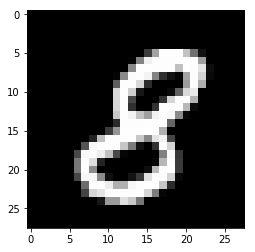

In [8]:
plt.imshow(batch_x[5].reshape((28, 28)), cmap='gray')

In [16]:
batch_x, batch_y = mnist.train.next_batch(batch_size=16)
print(batch_x.shape)
print(batch_y.shape)

(16, 784)
(16, 10)


In [5]:
?mnist.train.next_batch

### 4. Building the model

In [11]:
K.backend.clear_session() # Ensure that we start afresh

# 1. Instantiate model
model = K.models.Sequential() 

# 2. Add layers
NUM_HIDDEN = 300
NUM_OUTPUT = 10
model.add(K.layers.Dense(units=NUM_HIDDEN, activation='relu', input_shape=(784,)))
model.add(K.layers.Dense(units=NUM_OUTPUT, activation='softmax'))

# 3. Compile model. Specify: optimizer, loss and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 5. Train the model

In [13]:
model.fit(mnist.train.images, mnist.train.labels,
          batch_size=10, epochs=2,
          validation_data=(mnist.validation.images, mnist.validation.labels))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 13s - loss: 0.0780 - acc: 0.9760 - val_loss: 0.0872 - val_acc: 0.9758
Epoch 2/2
55000/55000 [==============================] - 15s - loss: 0.0538 - acc: 0.9829 - val_loss: 0.0703 - val_acc: 0.9780
